Imports

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rcParams
from scipy.optimize import curve_fit

Data loading and conversion

In [2]:
# Data loading
df = pd.read_csv('ROS_for_plotting.csv')

tidy_df = df.melt(id_vars=[], var_name='Treatment', value_name='Value')

# Split the 'Treatment' column into 'Compound' and 'Concentration'
tidy_df[['Compound', 'Concentration']] = tidy_df['Treatment'].str.split('_', expand=True)

# Convert 'Concentration' to float
tidy_df['Concentration'] = tidy_df['Concentration'].astype(float)

# Remove rows with NaN in 'Value' column
tidy_df = tidy_df.dropna(subset=['Value'])

print(tidy_df)


                    Treatment     Value              Compound  Concentration
0              SNCA-3x-DMSO_0  1.077243          SNCA-3x-DMSO            0.0
1              SNCA-3x-DMSO_0  0.967791          SNCA-3x-DMSO            0.0
2              SNCA-3x-DMSO_0  1.037071          SNCA-3x-DMSO            0.0
3              SNCA-3x-DMSO_0  0.818607          SNCA-3x-DMSO            0.0
4              SNCA-3x-DMSO_0  1.099288          SNCA-3x-DMSO            0.0
..                        ...       ...                   ...            ...
459  SNCA-3x-TyrphostinA9_2.5  0.390930  SNCA-3x-TyrphostinA9            2.5
462  SNCA-3x-TyrphostinA9_2.5  0.901104  SNCA-3x-TyrphostinA9            2.5
463  SNCA-3x-TyrphostinA9_2.5  0.121556  SNCA-3x-TyrphostinA9            2.5
464  SNCA-3x-TyrphostinA9_2.5  0.868559  SNCA-3x-TyrphostinA9            2.5
465  SNCA-3x-TyrphostinA9_2.5  0.274684  SNCA-3x-TyrphostinA9            2.5

[263 rows x 4 columns]


Plotting    

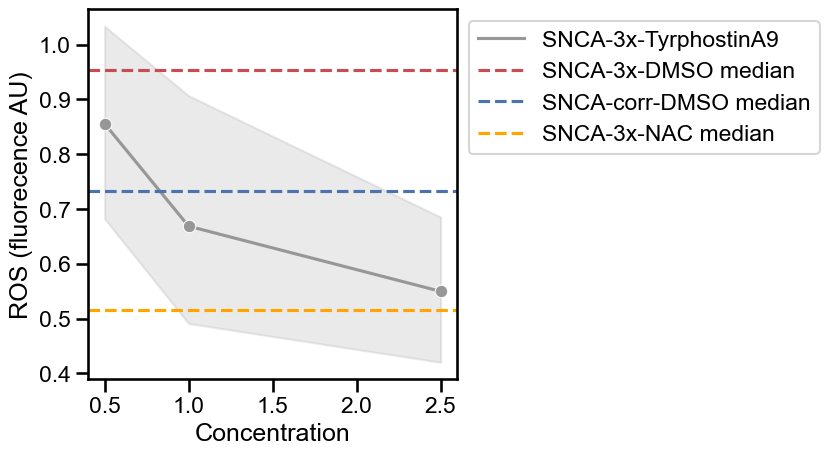

In [3]:
# Set the seaborn style to "talk" and font to "Arial"
sns.set_context("talk")
rcParams['font.family'] = 'Arial'

# Create a list of compounds to exclude from the plot
exclude_compounds = ['SNCA-3x-DMSO', 'SNCA-corr-DMSO', 'SNCA-3x-NAC']

# Create a new DataFrame excluding the specified compounds
plot_df = tidy_df[~tidy_df['Compound'].isin(exclude_compounds)]


# Create a line plot with the filtered DataFrame
ax = sns.lineplot(data=plot_df, x='Concentration', y='Value', hue='Compound', style='Compound', marker='o', dashes=False, palette='Greys_r')

# Define colors for the dashed lines
colors = ['#C44E52', '#4C72B0', 'orange']

# Calculate the median values of the excluded compounds and add them as dashed lines
for i, compound in enumerate(exclude_compounds):
    median_value = tidy_df[tidy_df['Compound'] == compound]['Value'].median()
    plt.axhline(y=median_value, linestyle='--', color=colors[i], label=f'{compound} median')

# Set plot title and labels
plt.xlabel('Concentration')
plt.ylabel('ROS (fluorecence AU)')

# Move the legend
ax.legend(loc="upper left", bbox_to_anchor=(1, 1))

# Axis scale
ax.set_box_aspect(1)

# Save the plot
plt.savefig('ROS_DRC' + '.pdf', bbox_inches='tight')
plt.show()
